# Hello Image Classification

This basic introduction to OpenVINO™ shows how to do inference with an image classification model.

A pre-trained [MobileNetV3 model](https://docs.openvino.ai/latest/omz_models_model_mobilenet_v3_small_1_0_224_tf.html) from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/) is used in this tutorial. For more information about how OpenVINO IR models are created, refer to the [TensorFlow to OpenVINO](../101-tensorflow-to-openvino/101-tensorflow-to-openvino.ipynb) tutorial.

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

## Load the Model

In [2]:
ie = Core()
model = ie.read_model(model="model/v3-small_224_1.0_float.xml")
compiled_model = ie.compile_model(model=model, device_name="CPU")

output_layer = compiled_model.output(0)

## Load an Image

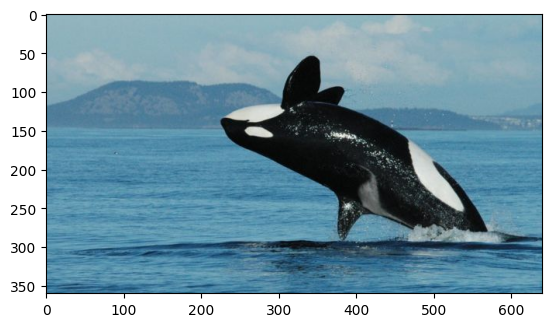

In [98]:
# The MobileNet model expects images in RGB format.
imagFileName="../data/fish2.jpg"
image = cv2.cvtColor(cv2.imread(filename=imagFileName), code=cv2.COLOR_BGR2RGB)

# Resize to MobileNet image shape.
input_image = cv2.resize(src=image, dsize=(224, 224))

# Reshape to model input shape.
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

## Do Inference

In [99]:
result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)

In [ ]:
# Quiz: imagenet_2012_ko.txt 파일을 사용할 때 UnicodeDecodeError를 수정하려면 어떻게 해야 할까요?
imagenet_classes = open("../imagenet/imagenet_2012_ko.txt").read().splitlines()

# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.
imagenet_classes = ['background'] + imagenet_classes
imagenet_classes[result_index[0]]
for idx in result_index:
    print("{} {} - {}".format(idx, imagenet_classes[idx], result_infer[0][idx]))